<a href="https://colab.research.google.com/github/Neuralnomad-hub/CODING-SAMURAI-INTERNSHIP-TASK/blob/main/Customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#customer churn rate prediction based on Behavioral and  demographic data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("Tele_customer_dataset.csv")
print(df.head(10))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

In [26]:
df.dtypes
df.TotalCharges.values
df.MonthlyCharges.values
pd.to_numeric(df.TotalCharges,errors="coerce").isnull()
df1 = df.loc[df.TotalCharges != " "].copy()
df1.shape
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

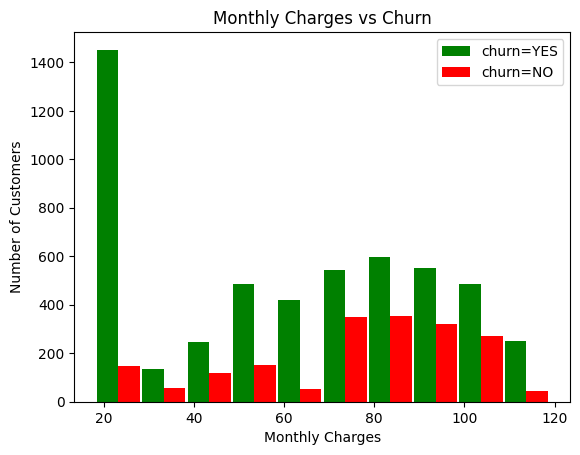

In [27]:
#visualization
y1=df1[df1.Churn=="No"].MonthlyCharges
y2=df1[df1.Churn=="Yes"].MonthlyCharges
plt.hist([y1,y2],rwidth=0.95,color=["green","red"],label=["churn=YES","churn=NO"])
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Monthly Charges vs Churn")
plt.legend()
plt.show()

In [28]:
#data cleaning as ml dont understand variables in data set so we gonna change in 0s and 1s
def unique_values(df1):
  for column in df1:
    if df[column].dtypes=="object":
       print(f"{column} : {df1[column].unique()}")
unique_values(df1)


customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [29]:
df1.replace("No internet service","NO",inplace=True)
df1.replace("No phone service","NO",inplace=True)
unique_values(df1)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['NO' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'NO']
OnlineBackup : ['Yes' 'No' 'NO']
DeviceProtection : ['No' 'Yes' 'NO']
TechSupport : ['No' 'Yes' 'NO']
StreamingTV : ['No' 'Yes' 'NO']
StreamingMovies : ['No' 'Yes' 'NO']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [36]:
yes_no_columns=["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]
for col in yes_no_columns:
  df1[col] = df1[col].replace({"Yes":1,"No":0})
unique_values(df1)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : [1 0]
Partner : [1 0]
Dependents : [0 1]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


/tmp/ipython-input-36-1258915168.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col] = df1[col].replace({"Yes":1,"No":0})


In [37]:
#using one hot encoding for categorical datsas
df1["gender"] = df1["gender"].replace({"Female":1,"Male":0})
df2=pd.get_dummies(data=df1,columns=["InternetService","Contract","PaymentMethod"])
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [38]:
df2.dtypes

,0
customerID,object
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64


In [39]:
# scaling using min max scaler to scale columns that are in numbers into 0s and 1s
cols_to_scale=["tenure","MonthlyCharges","TotalCharges"]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])
df2.head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,0.000000,0,0,0,1,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,0,0.464789,1,0,1,0,...,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,0,0,0,0.014085,1,0,1,1,...,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,0,0.619718,0,0,1,0,...,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,1,0,0,0,0.014085,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
5,9305-CDSKC,1,0,0,0,0.098592,1,1,0,0,...,False,True,False,True,False,False,False,False,True,False
6,1452-KIOVK,0,0,0,1,0.295775,1,1,0,1,...,False,True,False,True,False,False,False,True,False,False
7,6713-OKOMC,1,0,0,0,0.126761,0,0,1,0,...,True,False,False,True,False,False,False,False,False,True
8,7892-POOKP,1,0,1,0,0.380282,1,1,0,0,...,False,True,False,True,False,False,False,False,True,False
9,6388-TABGU,0,0,0,1,0.859155,1,0,1,1,...,True,False,False,False,True,False,True,False,False,False


from matplotlib import pyplot as plt
_df_0['gender'].plot(kind='hist', bins=20, title='gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Partner'].plot(kind='hist', bins=20, title='Partner')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Dependents'].plot(kind='hist', bins=20, title='Dependents')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('InternetService_DSL').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('InternetService_Fiber optic').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Contract_Month-to-month').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Contract_One year').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='gender', y='Partner', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Partner', y='Dependents', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Dependents', y='tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='tenure', y='PhoneService', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SeniorCitizen']
  ys = series['gender']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('SeniorCitizen', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('InternetService_DSL')):
  _plot_series(series, series_name, i)
  fig.legend(title='InternetService_DSL', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SeniorCitizen')
_ = plt.ylabel('gender')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SeniorCitizen']
  ys = series['gender']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('SeniorCitizen', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('InternetService_Fiber optic')):
  _plot_series(series, series_name, i)
  fig.legend(title='InternetService_Fiber optic', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SeniorCitizen')
_ = plt.ylabel('gender')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SeniorCitizen']
  ys = series['gender']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('SeniorCitizen', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Contract_Month-to-month')):
  _plot_series(series, series_name, i)
  fig.legend(title='Contract_Month-to-month', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SeniorCitizen')
_ = plt.ylabel('gender')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SeniorCitizen']
  ys = series['gender']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('SeniorCitizen', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Contract_One year')):
  _plot_series(series, series_name, i)
  fig.legend(title='Contract_One year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SeniorCitizen')
_ = plt.ylabel('gender')

from matplotlib import pyplot as plt
_df_16['gender'].plot(kind='line', figsize=(8, 4), title='gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Partner'].plot(kind='line', figsize=(8, 4), title='Partner')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Dependents'].plot(kind='line', figsize=(8, 4), title='Dependents')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['InternetService_Fiber optic'].value_counts()
    for x_label, grp in _df_20.groupby('InternetService_DSL')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('InternetService_DSL')
_ = plt.ylabel('InternetService_Fiber optic')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Contract_Month-to-month'].value_counts()
    for x_label, grp in _df_21.groupby('InternetService_Fiber optic')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('InternetService_Fiber optic')
_ = plt.ylabel('Contract_Month-to-month')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Contract_One year'].value_counts()
    for x_label, grp in _df_22.groupby('Contract_Month-to-month')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Contract_Month-to-month')
_ = plt.ylabel('Contract_One year')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PaymentMethod_Bank transfer (automatic)'].value_counts()
    for x_label, grp in _df_23.groupby('Contract_One year')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Contract_One year')
_ = plt.ylabel('PaymentMethod_Bank transfer (automatic)')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['InternetService_DSL'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='gender', y='InternetService_DSL', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['InternetService_Fiber optic'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='gender', y='InternetService_Fiber optic', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Contract_Month-to-month'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='gender', y='Contract_Month-to-month', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['Contract_One year'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='gender', y='Contract_One year', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [42]:
x=df2.drop(["Churn", "customerID"],axis="columns")
y=df2["Churn"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
x_train.shape

(5625, 26)

In [44]:
#deep neurons training
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,y_train,epochs=100)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7497 - loss: 0.5262
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7910 - loss: 0.4286
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8005 - loss: 0.4166
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8150 - loss: 0.4031
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8031 - loss: 0.4159
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8071 - loss: 0.4101
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8060 - loss: 0.4108
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8122 - loss: 0.3983
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8085 - loss: 0.4043
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8152 - loss: 0.3971
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8135 - loss: 0.3966
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [45]:
model.evaluate(x_test,y_test)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7814 - loss: 0.4859 


[0.5048317909240723, 0.7654584050178528]

In [49]:
yp=model.predict(x_test)
yp[:10]
y_pred=[]
for element in yp:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

y_pred[:10]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step


[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [50]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       999
           1       0.61      0.52      0.56       408

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

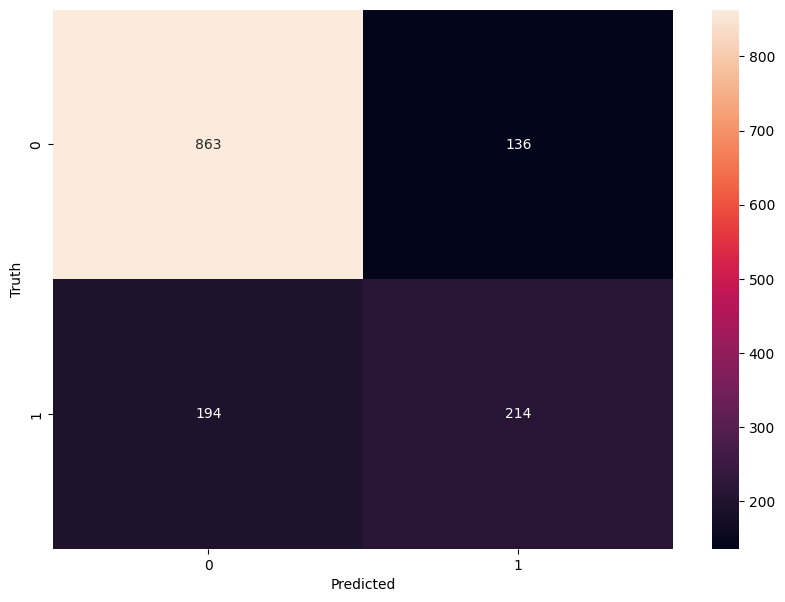

In [51]:
#confusion matrix
import seaborn as sn
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
